----
# **CHURN PREDICTION ANALYSIS**
-----

## **IMPORT LIBRARIES**

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [150]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

In [119]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [120]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.


In [121]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [122]:
import xgboost
import lightgbm
print("xgboost and lightgbm are installed successfully.")


xgboost and lightgbm are installed successfully.


In [123]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## **1. DATASET DETAILS AND EXPLORATORY DATA ANALYSIS (EDA)**

### **1.1 DATASET OVERVIEW**

In [126]:
# Load the dataset
df = pd.read_csv("churn.csv")
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [127]:
df.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


### **1.2 CHECK FOR MISSING VALUES**

In [128]:
df.info()
nan_strings = (df.applymap(lambda x: str(x).strip().lower() == 'nan')).sum()
print("\nNaN-Like Strings Per Column:")
print(nan_strings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

### **1.3 DATA CLEANING**

In [129]:
# Step 1: Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True)

# Step 2: Convert columns to numeric and handle missing values
df["day.charge"] = pd.to_numeric(df["day.charge"], errors="coerce")
df["eve.mins"] = pd.to_numeric(df["eve.mins"], errors="coerce")

# Step 3: Fill missing values with the median
df["day.charge"].fillna(df["day.charge"].median(), inplace=True)
df["eve.mins"].fillna(df["eve.mins"].median(), inplace=True)

# Step 4: Standardize categorical columns (convert to lowercase for consistency)
for col in ["voice.plan", "intl.plan", "churn"]:
    df[col] = df[col].str.lower()

### **1.4 FEATURE ENGINEERING**

In [130]:
df_cleaned = df.copy()

In [131]:
df_cleaned.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653454,200.582340,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.159936,50.433144,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.600000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,233.900000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [132]:
# Identify categorical columns
categorical_columns = ['state', 'area.code', 'voice.plan', 'intl.plan', 'churn']

# Identify numerical columns
numerical_columns = [
    'account.length','intl.mins', 'intl.calls', 
    'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 
    'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls'
]

### **1.4 VISUALIZING TARGET VARIABLE**

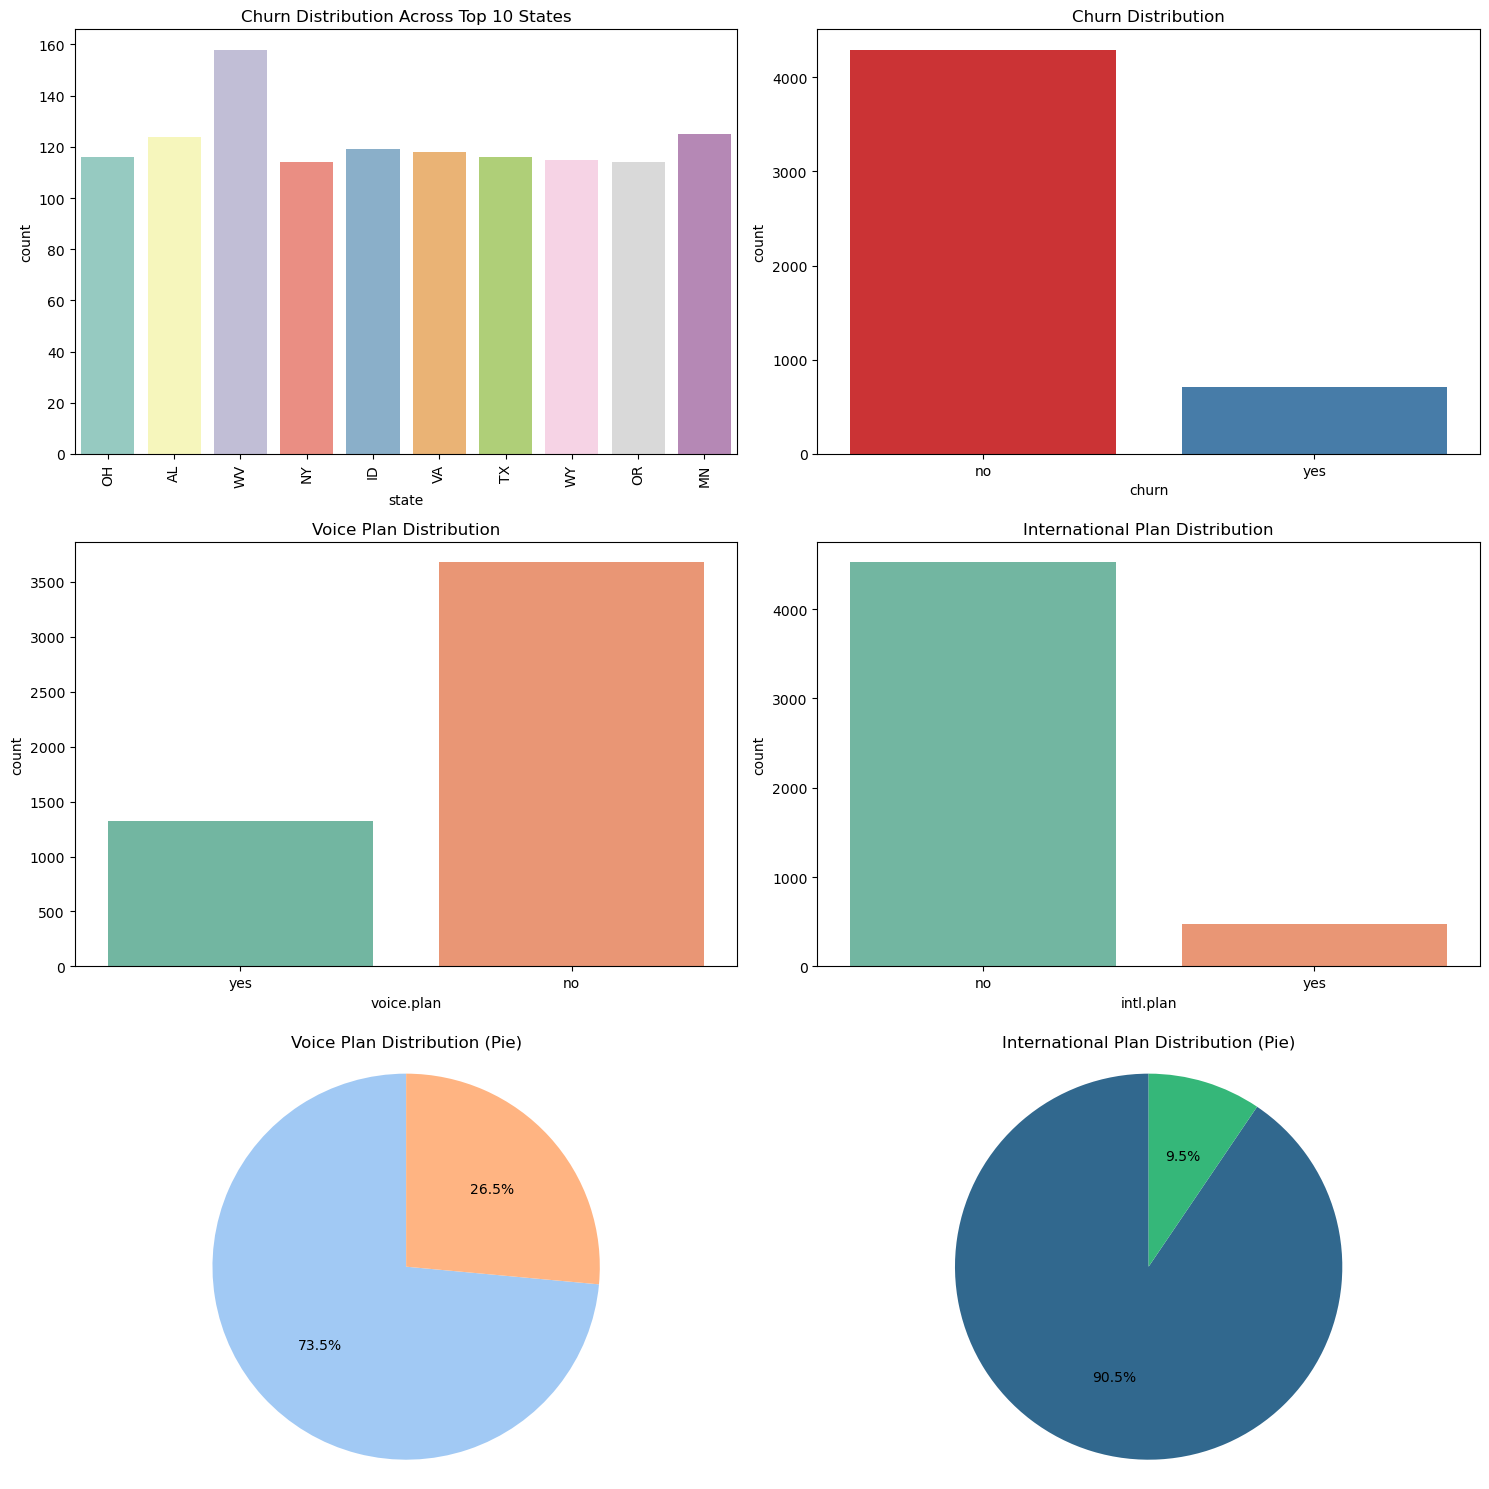

In [133]:
# Set a color palette for the count plots
color_palette = sns.color_palette("Set2", 4)  # Using 'Set2' palette, which has 4 colors

# Create a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Distribution of States (Top 10)
top_states = df_cleaned["state"].value_counts().nlargest(10).index
sns.countplot(data=df_cleaned[df_cleaned["state"].isin(top_states)], x="state", ax=axes[0, 0], palette='Set3')
axes[0, 0].set_title("Churn Distribution Across Top 10 States")
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot 2: Churn Distribution (Bar Plot)
sns.countplot(data=df_cleaned, x='churn', ax=axes[0, 1], palette='Set1')  # Using Set1 palette for churn plot
axes[0, 1].set_title('Churn Distribution')

# Plot 3: Voice Plan Distribution (Bar Plot)
sns.countplot(data=df_cleaned, x='voice.plan', ax=axes[1, 0], palette=color_palette)
axes[1, 0].set_title('Voice Plan Distribution')

# Plot 4: International Plan Distribution (Bar Plot)
sns.countplot(data=df_cleaned, x='intl.plan', ax=axes[1, 1], palette=color_palette)
axes[1, 1].set_title('International Plan Distribution')

# Plot 5: Voice Plan Distribution (Pie Chart)
voice_plan_counts = df_cleaned['voice.plan'].value_counts()
axes[2, 0].pie(
    voice_plan_counts, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel")[0:len(voice_plan_counts)]
)
axes[2, 0].set_title('Voice Plan Distribution (Pie)')
axes[2, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 6: International Plan Distribution (Pie Chart)
intl_plan_counts = df_cleaned['intl.plan'].value_counts()
axes[2, 1].pie(
    intl_plan_counts, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("viridis", len(intl_plan_counts))
)
axes[2, 1].set_title('International Plan Distribution (Pie)')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

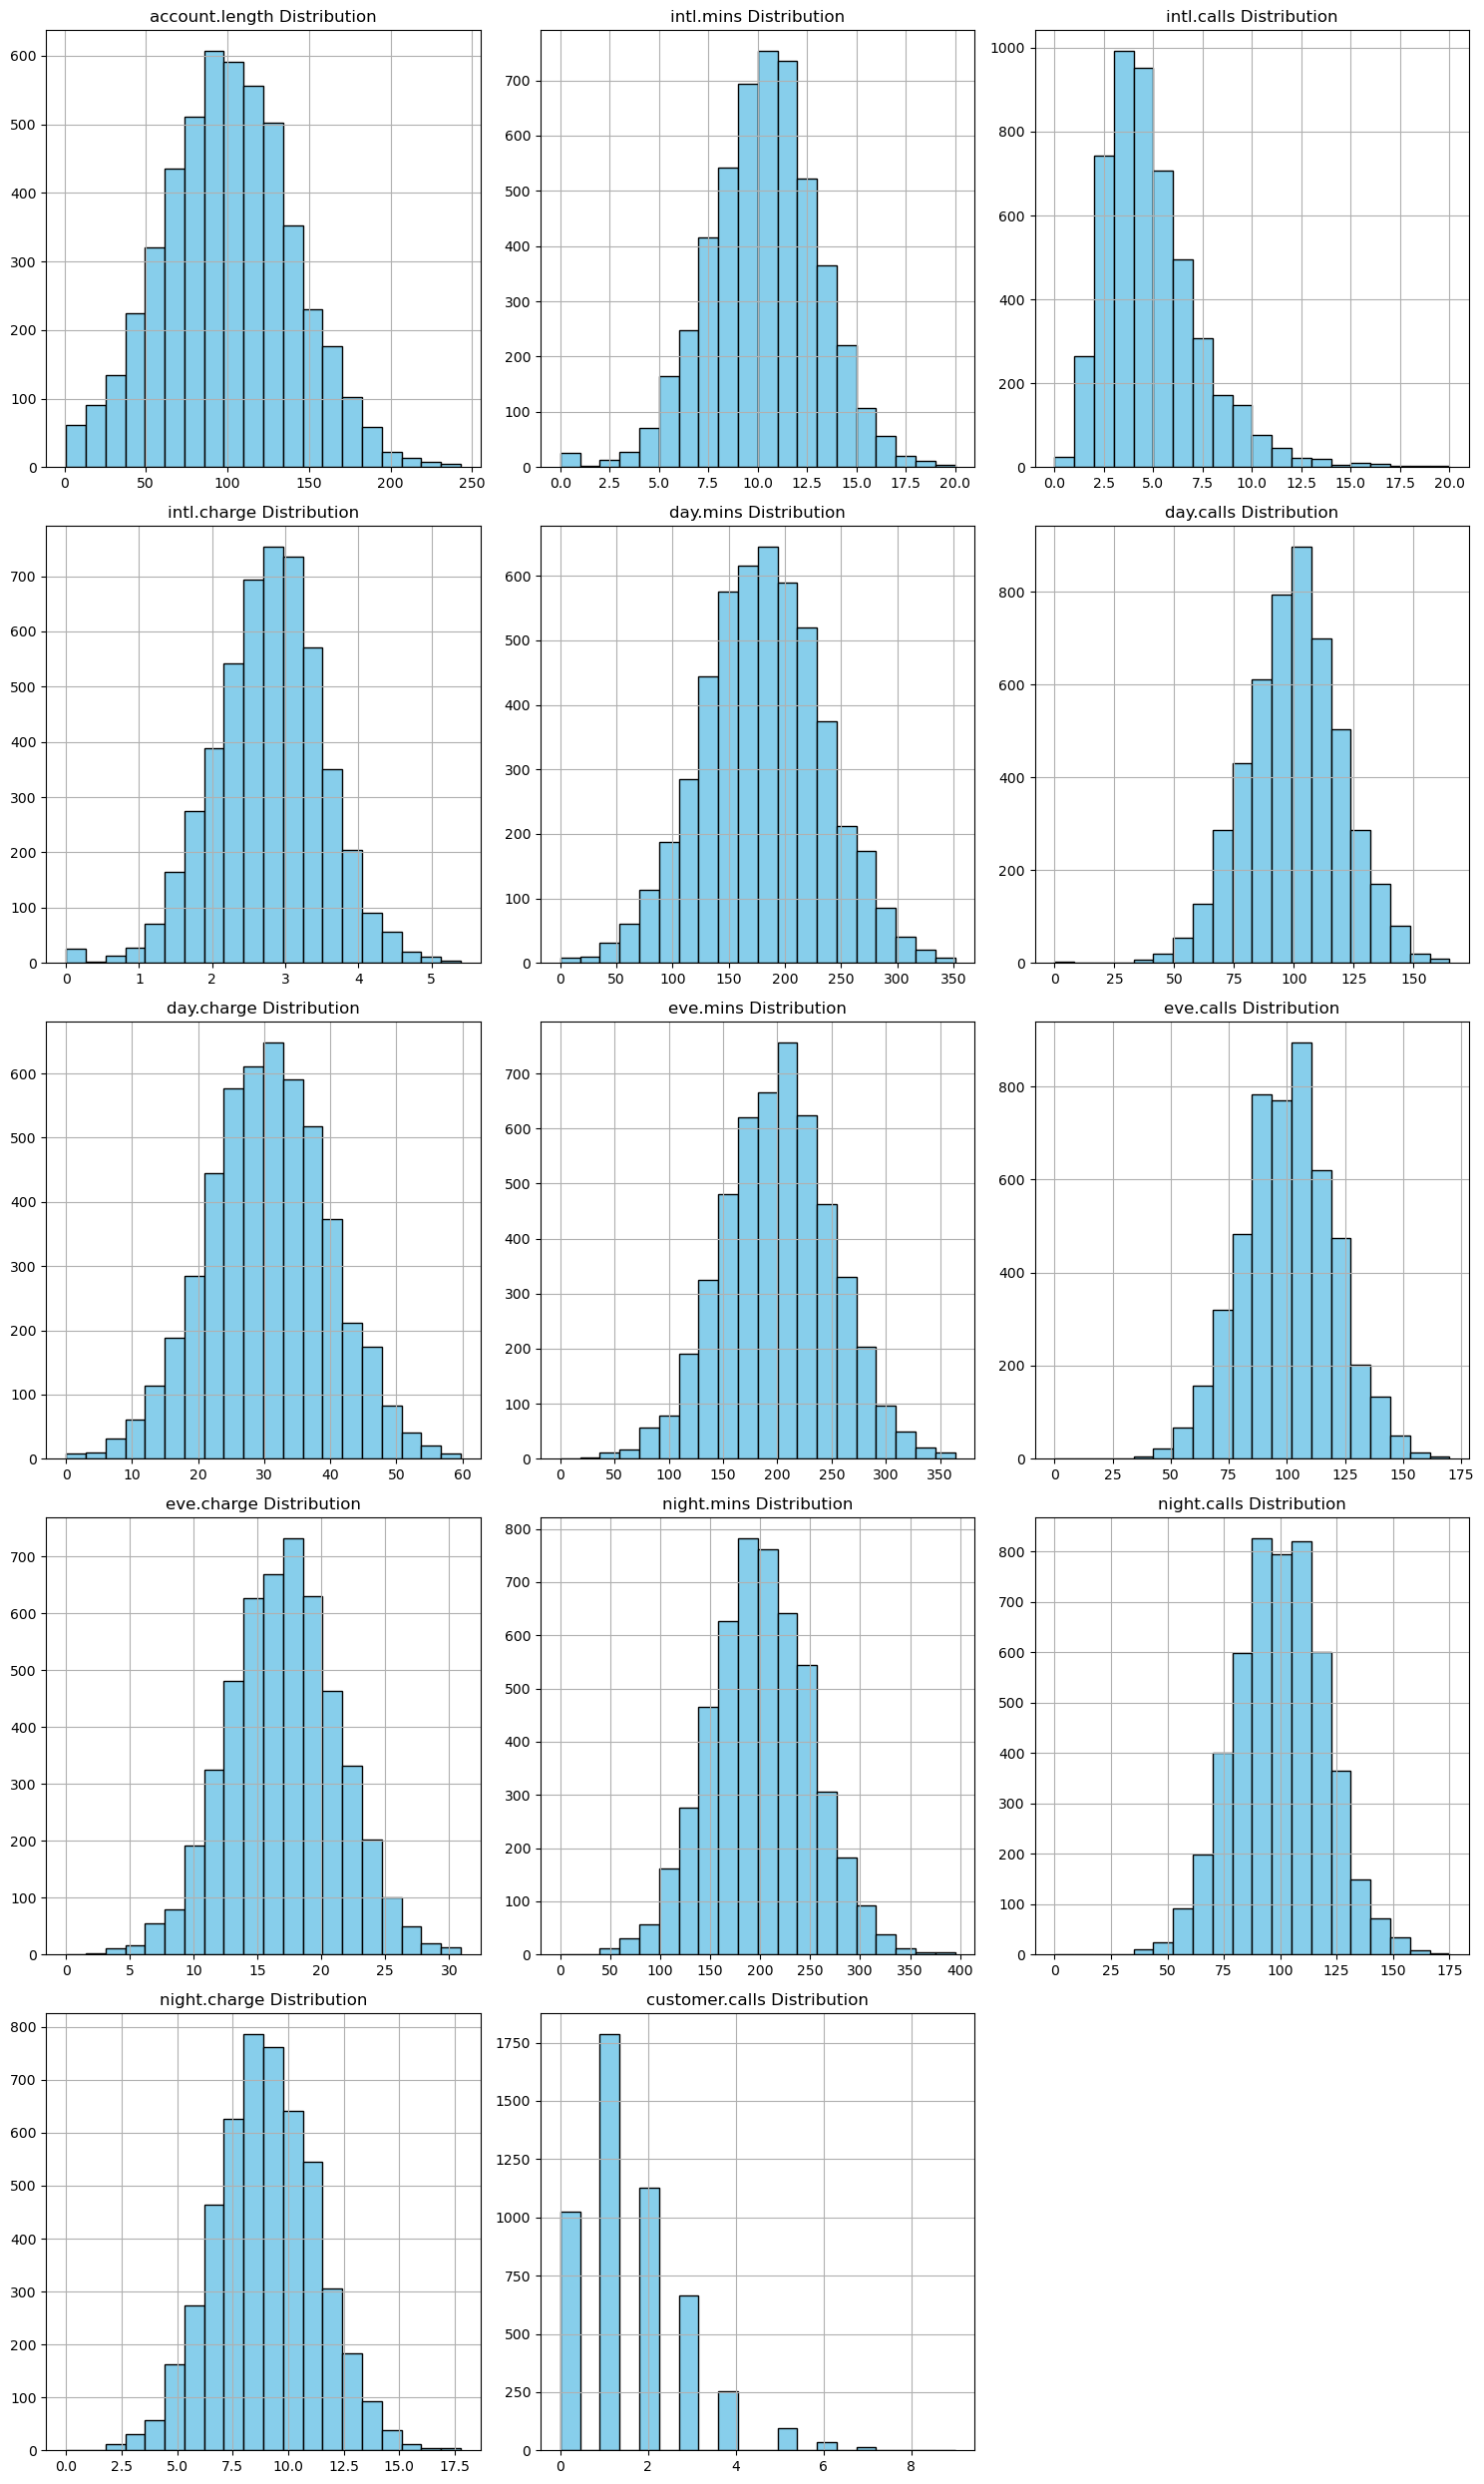

In [134]:
    num_cols = len(numerical_columns)
    num_rows = math.ceil(num_cols / 3)  # 3 columns per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Adjust figure size
    axes = axes.flatten()  # Flatten for easy indexing

    # Plot histograms
    for i, col in enumerate(numerical_columns):
        ax = axes[i]
        df_cleaned[col].hist(bins=20, ax=ax, color="skyblue", edgecolor="black")
        ax.set_title(f'{col} Distribution')

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

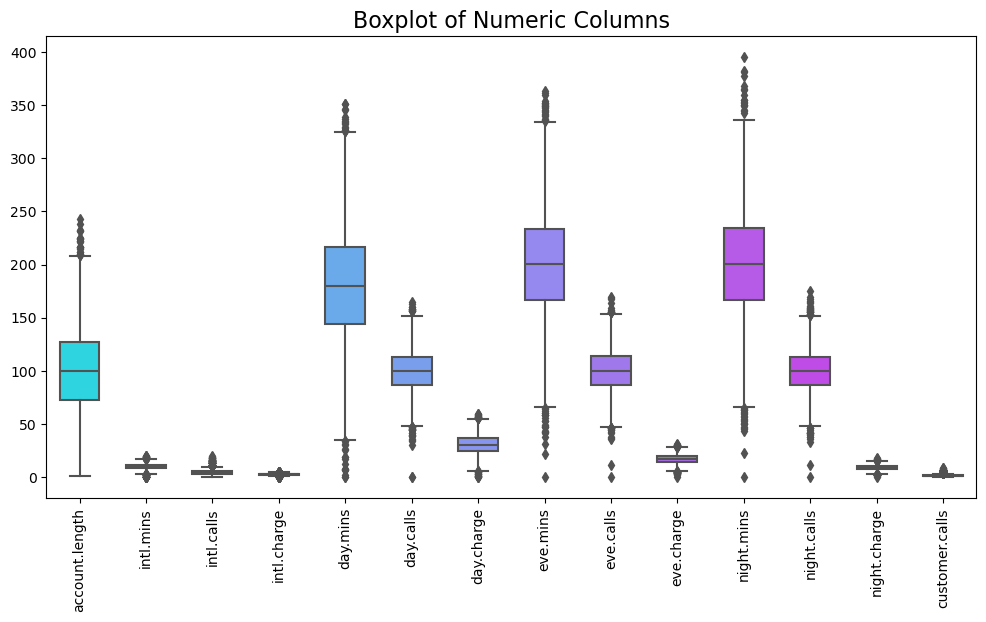

In [135]:
# Box plots for numerical columns to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numerical_columns], palette="cool", width=0.6)
plt.title("Boxplot of Numeric Columns", fontsize=16)
plt.xticks(rotation=90)
plt.show()

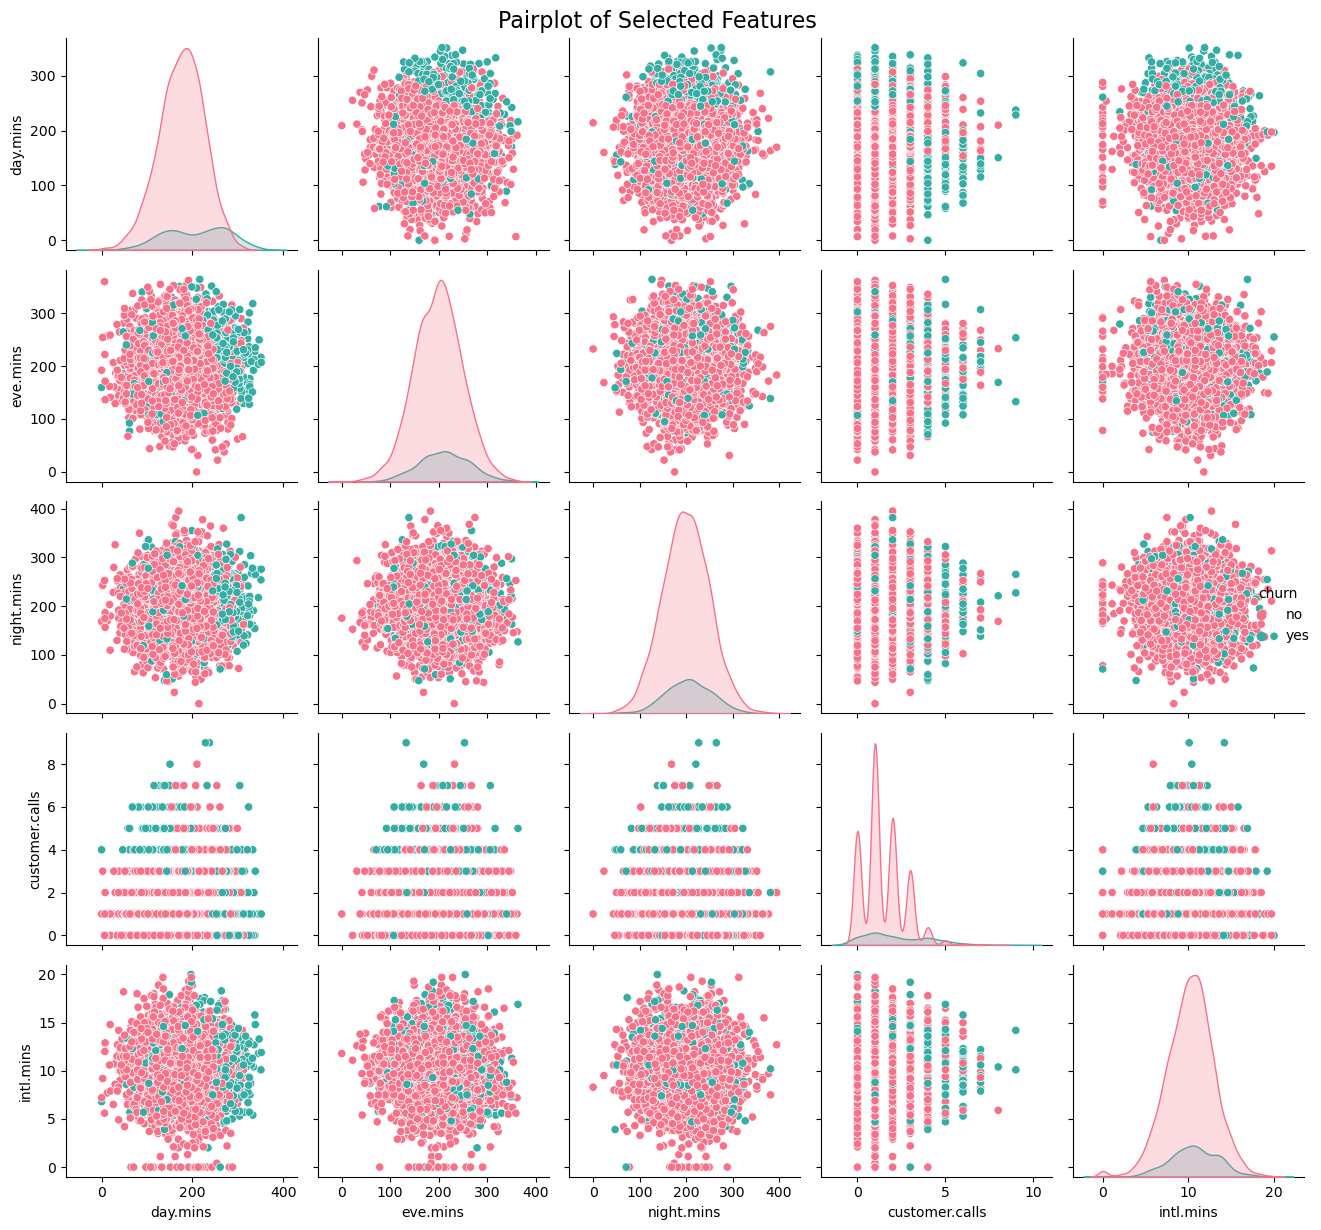

In [137]:
# Pairplot of Select Features
selected_features = ["day.mins", "eve.mins", "night.mins", "customer.calls", 
                     "intl.mins", "intl.plan", "churn"]
sns.pairplot(df_cleaned[selected_features], hue="churn", palette="husl")
plt.suptitle("Pairplot of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

## **2. FEATURE ENGINEERING**

### **2.1 CORRELATION ANALYSIS**

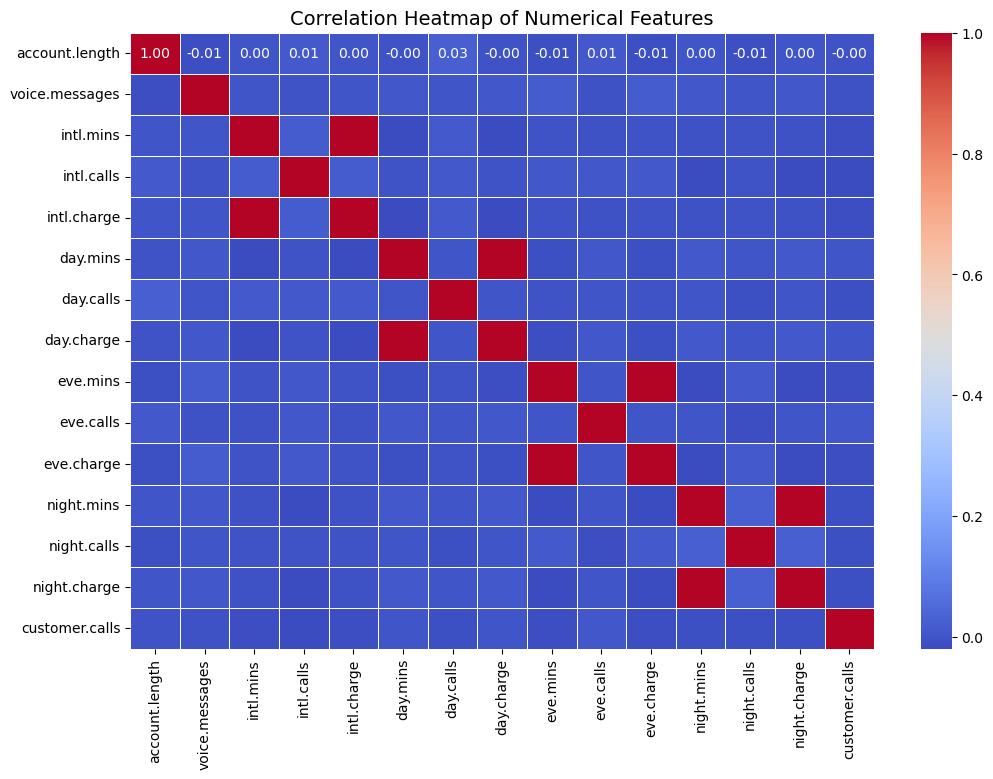

In [138]:
# Select only numeric columns for correlation
numeric_data = df_cleaned.select_dtypes(include=["number"])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


### **2.2 ENCODING CATEGORICAL VARIABLES**

In [139]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns that need to be label encoded
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Example: Apply label encoding to specific columns if needed
df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Show the first few rows of the cleaned dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   int32  
 1   area.code       5000 non-null   int32  
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   int32  
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   int32  
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

### **2.3 OUTLIER REMOVAL**

In [140]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Exclude the 'churn' column from numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.difference(['churn'])

# Apply the outlier detection to numeric columns (excluding 'churn')
outlier_flags = df_cleaned[numeric_columns].apply(detect_outliers_iqr)

# Count the number of outliers per column
outliers_per_column = outlier_flags.sum(axis=0)

# Calculate the total number of rows affected by outliers
rows_with_outliers = outlier_flags.any(axis=1).sum()

# Drop rows with outliers and calculate the remaining shape
df_no_outlier = df_cleaned[~outlier_flags.any(axis=1)]
remaining_shape = df_no_outlier.shape

# Print the results
print(f"Original dataset shape: {df_cleaned.shape}")
print(f"Dataset shape after removing outliers: {remaining_shape}")
print("\nOutliers detected per column:")
print(outliers_per_column.sort_values(ascending=False))
print(f"\nTotal rows affected by outliers: {rows_with_outliers}")

Original dataset shape: (5000, 20)
Dataset shape after removing outliers: (4158, 20)

Outliers detected per column:
customer.calls    399
intl.calls        118
intl.charge        72
intl.mins          72
voice.messages     60
eve.mins           45
night.calls        43
eve.charge         42
night.charge       39
night.mins         39
day.calls          35
day.charge         34
day.mins           34
eve.calls          27
account.length     24
dtype: int64

Total rows affected by outliers: 842


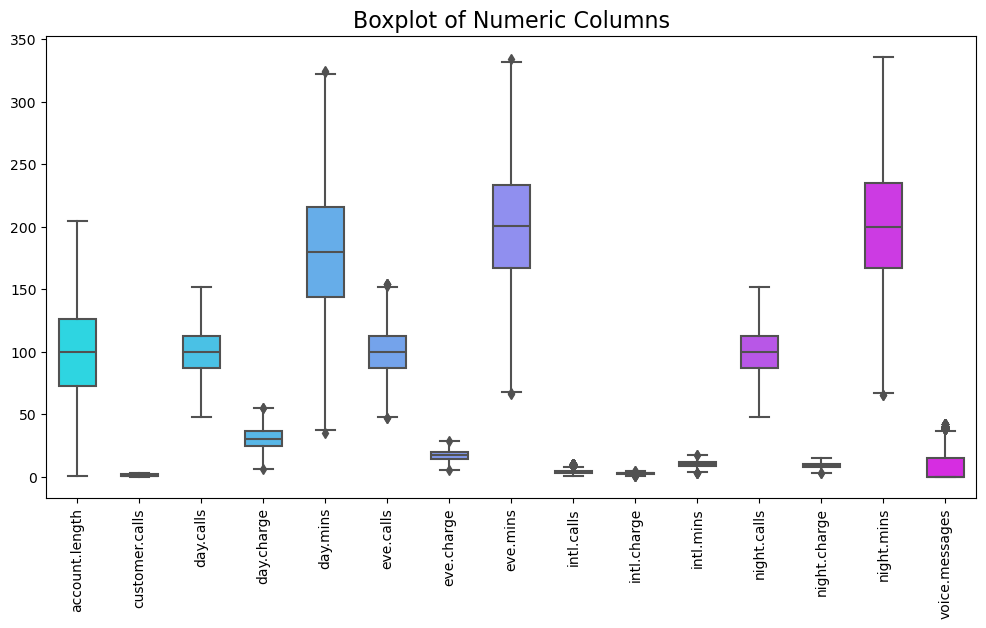

In [141]:
# Boxplot of the numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outlier[numeric_columns], palette="cool", width=0.6)
plt.title("Boxplot of Numeric Columns", fontsize=16)
plt.xticks(rotation=90)
plt.show()

### **2.4 NEW FEATURE**

## **3. MODEL BUILDING**

### **3.1 DATA SPLITTING**

In [142]:
# Define features and target variable
X = df_no_outlier.drop(columns=["churn"])  
y = df_no_outlier["churn"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **4. MODEL EVALUATION**

In [143]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

In [144]:
# Initialize a dictionary to store all metrics for every model
all_model_metrics = []

# Loop through all models and collect metrics
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Collect metrics for Class 1 (positive class) and overall accuracy
    all_model_metrics.append({
        "Model": name,
        "Precision": report["1"]["precision"] * 100,  # Convert to percentage
        "Recall": report["1"]["recall"] * 100,        # Convert to percentage
        "F1-Score": report["1"]["f1-score"] * 100,    # Convert to percentage
        "Accuracy": accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    })

# Convert the list of dictionaries into a DataFrame
df_metrics = pd.DataFrame(all_model_metrics)

[LightGBM] [Info] Number of positive: 350, number of negative: 2976
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2408
[LightGBM] [Info] Number of data points in the train set: 3326, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.105232 -> initscore=-2.140402
[LightGBM] [Info] Start training from score -2.140402


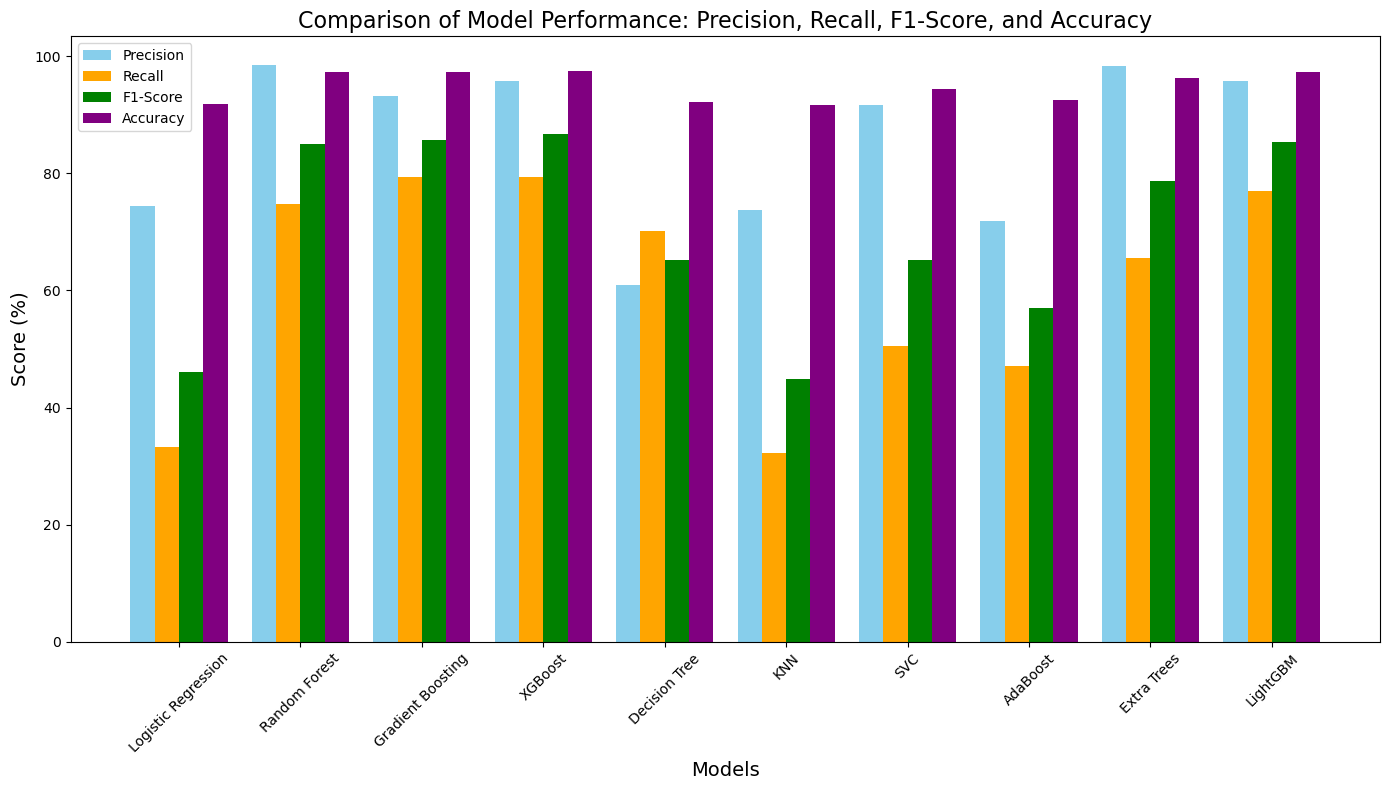

                 Model  Precision     Recall   F1-Score   Accuracy
0  Logistic Regression  74.358974  33.333333  46.031746  91.826923
1        Random Forest  98.484848  74.712644  84.967320  97.235577
2    Gradient Boosting  93.243243  79.310345  85.714286  97.235577
3              XGBoost  95.833333  79.310345  86.792453  97.475962
4        Decision Tree  61.000000  70.114943  65.240642  92.187500
5                  KNN  73.684211  32.183908  44.800000  91.706731
6                  SVC  91.666667  50.574713  65.185185  94.350962
7             AdaBoost  71.929825  47.126437  56.944444  92.548077
8          Extra Trees  98.275862  65.517241  78.620690  96.274038
9             LightGBM  95.714286  77.011494  85.350318  97.235577


In [145]:
plt.figure(figsize=(14, 8))

# Bar width for grouped bars
bar_width = 0.2
r1 = range(len(df_metrics))  # Position for precision bars
r2 = [x + bar_width for x in r1]  # Position for recall bars
r3 = [x + 2 * bar_width for x in r1]  # Position for F1-score bars
r4 = [x + 3 * bar_width for x in r1]  # Position for accuracy bars

# Plot each metric for each model
plt.bar(r1, df_metrics["Precision"], color="skyblue", width=bar_width, label="Precision")
plt.bar(r2, df_metrics["Recall"], color="orange", width=bar_width, label="Recall")
plt.bar(r3, df_metrics["F1-Score"], color="green", width=bar_width, label="F1-Score")
plt.bar(r4, df_metrics["Accuracy"], color="purple", width=bar_width, label="Accuracy")

# Add labels and title
plt.xlabel("Models", fontsize=14)
plt.ylabel("Score (%)", fontsize=14)
plt.title("Comparison of Model Performance: Precision, Recall, F1-Score, and Accuracy", fontsize=16)
plt.xticks([r + 1.5 * bar_width for r in range(len(df_metrics))], df_metrics["Model"], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the full metrics for reference
print(df_metrics)

## **4.1 ROC CURVE**

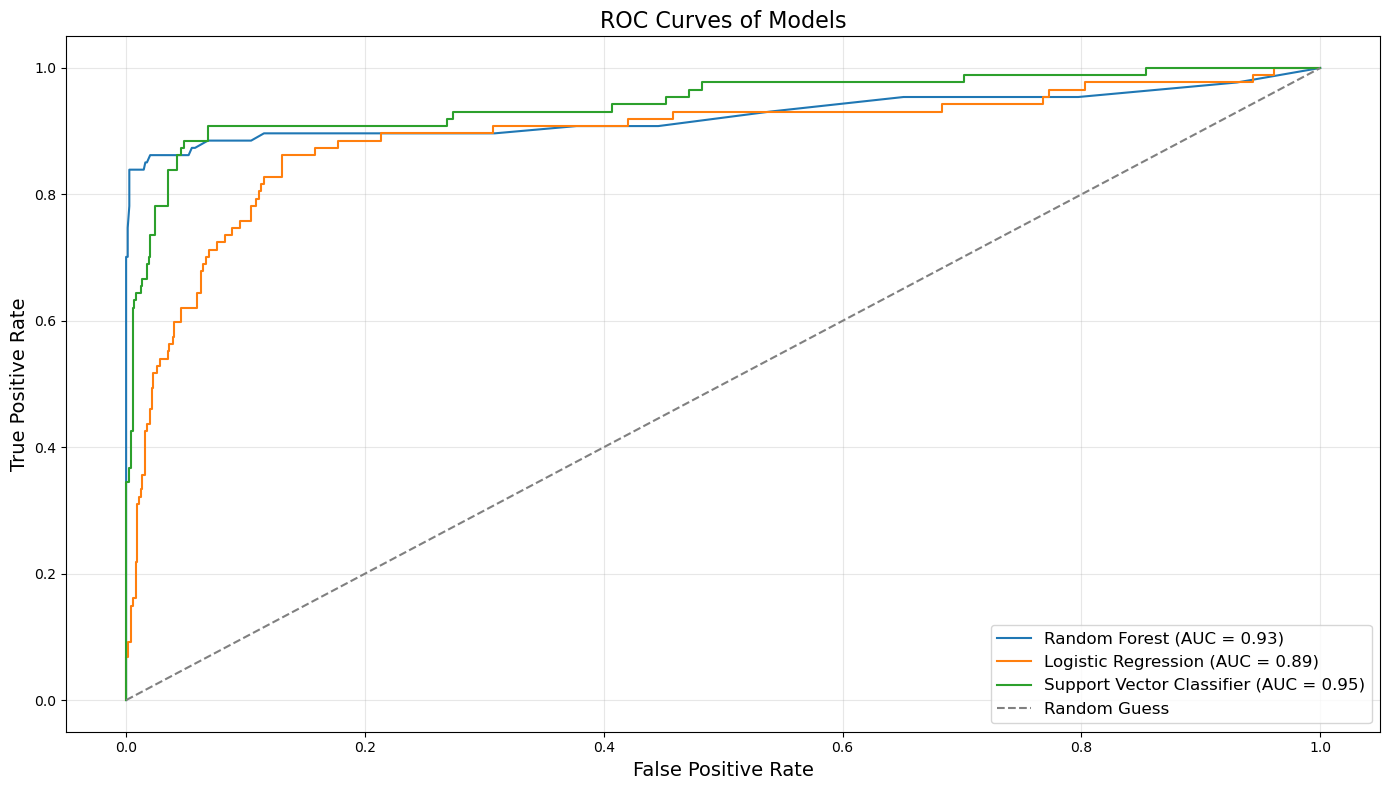

In [153]:
from sklearn.svm import SVC

# Define a dictionary of models with probability=True for SVC
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42)  # Set probability=True
}

# Plot ROC curves for all models
plt.figure(figsize=(14, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Add labels, legend, and title
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curves of Models", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


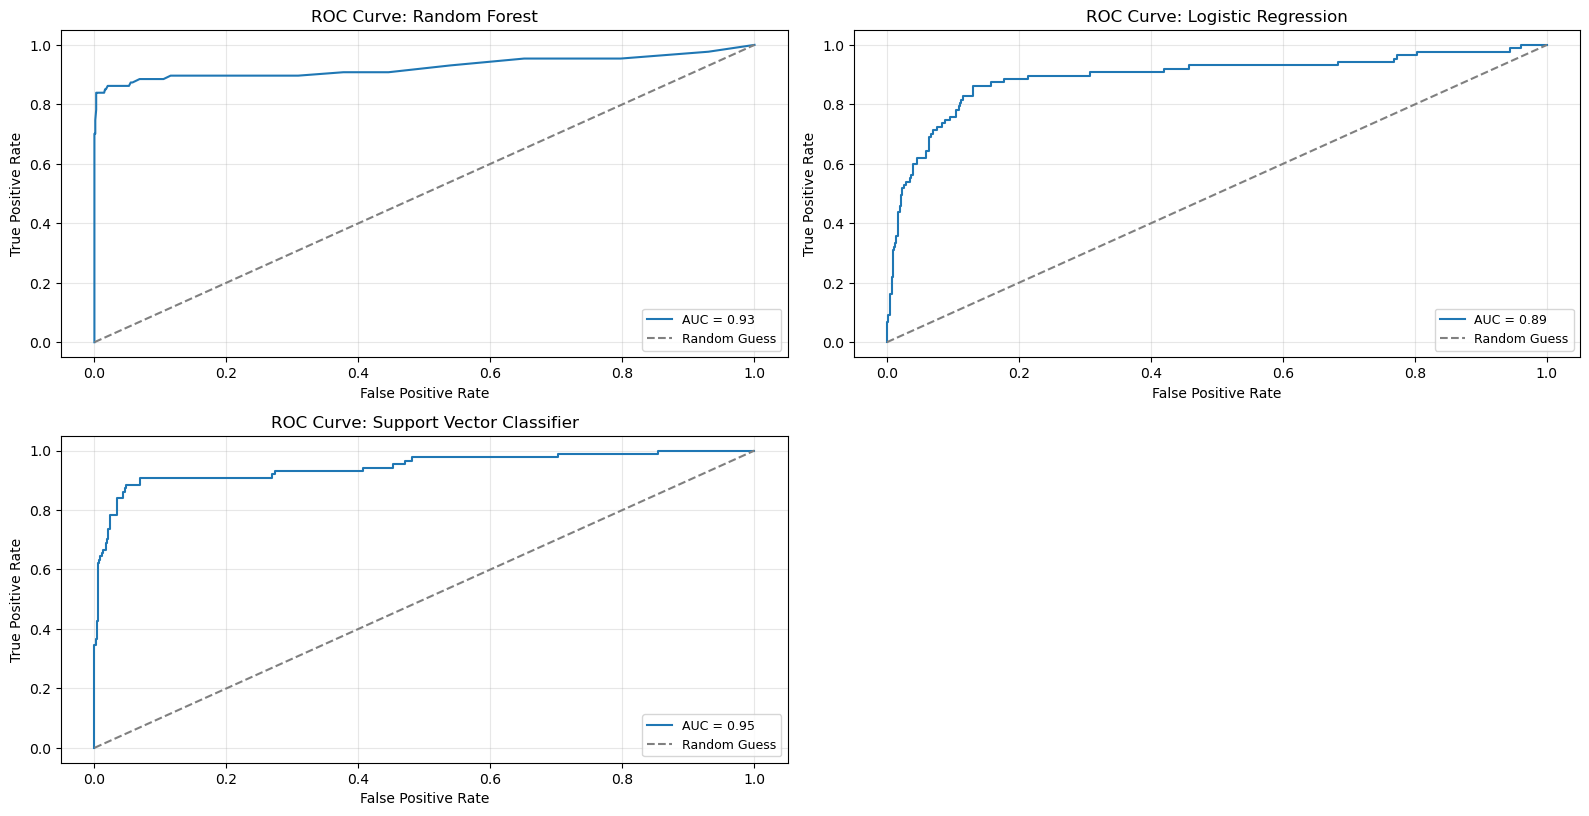

In [154]:
# Create a 5x2 subplot
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

# Plot each ROC curve in its respective subplot
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    ax.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
    
    # Add labels, legend, and title
    ax.set_title(f"ROC Curve: {name}", fontsize=12)
    ax.set_xlabel("False Positive Rate", fontsize=10)
    ax.set_ylabel("True Positive Rate", fontsize=10)
    ax.legend(loc="lower right", fontsize=9)
    ax.grid(alpha=0.3)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### **4.1 RANDOM FOREST CLASSIFIER**

In [155]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy*100:.1f}")
print("\nClassification Report:\n", class_report)


Accuracy: 97.2

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       745
           1       0.98      0.75      0.85        87

    accuracy                           0.97       832
   macro avg       0.98      0.87      0.92       832
weighted avg       0.97      0.97      0.97       832



### **4.2 XGBOOST**

In [156]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy*100:.1f}")
print("\nClassification Report:\n", class_report)


Accuracy: 97.4

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       745
           1       0.91      0.83      0.87        87

    accuracy                           0.97       832
   macro avg       0.95      0.91      0.93       832
weighted avg       0.97      0.97      0.97       832



## **5. DEPLOYMENT**

In [157]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset (replace 'Churn.csv' with the correct file path)
df = pd.read_csv("Churn.csv")

# Ensure the dataset is clean and ready (assumes 'churn' is the target column)
# Select features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns (assuming you know them; you can also detect them automatically)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define a ColumnTransformer to handle different types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Scale numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Encode categorical columns
    ])

# Build the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(pipeline, 'churn_model.pkl')
print("Model saved successfully!")


Model saved successfully!
